### Impoerter les paqages

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1) Préparer la BDD

In [2]:
df = fetch_california_housing()
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

####  
  * difiser la Bdd train,test et validation

In [3]:
X = df.data
y = df.target
X_train_full, X_test  ,    y_train_full, y_test   = train_test_split(X, y, random_state=42)
X_train, X_valid      ,    y_train,y_valid        = train_test_split(X_train_full, y_train_full, random_state=42)

In [4]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### 2) Création l'archetacture du model

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


#model.summary()

### 3) Entainer le model

In [6]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])

model_h = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 282us/sample - loss: 1.8423 - mae: 0.9996 - val_loss: 5.2165 - val_mae: 0.7085
Epoch 2/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.6876 - mae: 0.6101 - val_loss: 0.7732 - val_mae: 0.5748
Epoch 3/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.5954 - mae: 0.5625 - val_loss: 0.5446 - val_mae: 0.5328
Epoch 4/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5553 - mae: 0.5392 - val_loss: 0.5425 - val_mae: 0.5220
Epoch 5/20
11610/11610 [==============================] - 1s 96us/sample - loss: 0.5268 - mae: 0.5245 - val_loss: 0.5539 - val_mae: 0.5070
Epoch 6/20
11610/11610 [==============================] - 1s 81us/sample - loss: 0.5049 - mae: 0.5124 - val_loss: 0.4701 - val_mae: 0.4929
Epoch 7/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.4852 - mae: 0.5009 - val_loss: 0.

### 4) tester la performence de model

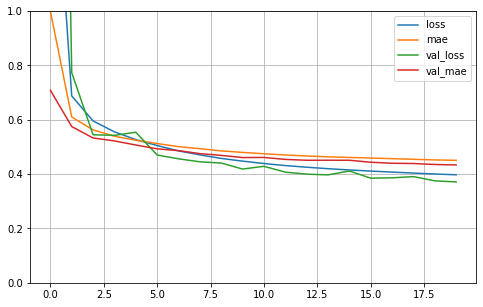

5160/5160 [==============================] - 0s 32us/sample - loss: 0.3943 - mae: 0.4491


[0.394307673277781, 0.44909477]

In [7]:
#model_h.history
#model_h.params
pd.DataFrame(model_h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test, y_test)

### 5) Validation le model

In [8]:
X_new = X_test[:3]

y_pred = model.predict_classes(X_new)


print (y_pred)
print(y_test[:3])

[[1]
 [1]
 [1]]
[0.477   0.458   5.00001]
